# Sistema de Recomendação de Filmes
    Implementação de um sistema de recomendação baseado em filtragem colaborativa,
    Neste notebook, iremos implementar um sistema de recomendação de filmes utilizando a similaridade entre usuários com base nas suas avaliações de filmes.

In [13]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Configuração para exibir gráficos
%matplotlib inline

In [14]:
# -------------------- Funções de Manipulação & Preparação dos Dados --------------------

def carregar_dados(ratings_path='ratings.csv', movies_path='movies.csv'):
    """Carrega e retorna os datasets de ratings e movies."""
    ratings = pd.read_csv(ratings_path)
    movies = pd.read_csv(movies_path)
    return ratings, movies

def tratar_valores_nulos(df):
    """Remove valores nulos de um DataFrame."""
    df.dropna(inplace=True)
    return df

def converter_timestamp(ratings):
    """Converte o campo timestamp para uma data legível."""
    ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
    return ratings

def criar_matriz_usuario_filme(ratings):
    """Cria e retorna uma matriz de usuários-filmes preenchendo valores nulos com 0."""
    user_movie_matrix = ratings.pivot_table(
        index='userId', columns='movieId', values='rating'
    ).fillna(0)
    return user_movie_matrix

def converter_para_numpy(matrix):
    """Converte a matriz Pandas para um array NumPy."""
    return matrix.to_numpy()

In [15]:
# -------------------- Funções de Cálculo de Similaridade & Previsão --------------------

def calcular_similaridade(matriz):
    """Calcula a similaridade de cosseno entre usuários ou filmes."""
    similaridade = cosine_similarity(matriz)
    return similaridade

In [16]:
# -------------------- Funções de Recomendação & Visualização --------------------

def gerar_recomendacoes(user_id, user_movie_matrix, similaridade, top_n=10):
    """Gera recomendações com base nos cálculos realizados."""
    
    # Verifica se o user_id existe na matriz
    if user_id not in user_movie_matrix.index:
        raise ValueError(f"User ID {user_id} não encontrado na matriz.")

    user_index = user_movie_matrix.index.get_loc(user_id)  # Localiza o índice do usuário na matriz
    similar_users = similaridade[user_index]

    # Somamos os ratings ponderados pela similaridade com outros usuários
    recommendation_scores = user_movie_matrix.T.dot(similar_users) / np.array([np.abs(similar_users).sum()])
    
    # Identifica filmes que o usuário já avaliou
    user_rated = user_movie_matrix.iloc[user_index]
    rated_movie_ids = user_rated[user_rated > 0].index  # Obtemos os IDs dos filmes já avaliados
    
    # Remove as pontuações dos filmes já avaliados para evitar recomendá-los
    recommendation_scores.loc[rated_movie_ids] = 0
    
    # Seleciona os top N filmes com maiores pontuações
    top_movies_indices = np.argsort(recommendation_scores)[-top_n:][::-1]
    recommended_movies = user_movie_matrix.columns[top_movies_indices]

    return recommended_movies.tolist()



In [17]:
# -------------------- Carregar, Processar os Dados e Calcular Similaridade --------------------

# Carregamento dos dados
ratings, movies = carregar_dados()

# Tratamento de valores nulos
ratings = tratar_valores_nulos(ratings)
movies = tratar_valores_nulos(movies)

# Conversão do campo timestamp
ratings = converter_timestamp(ratings)

# Criação da matriz usuário-filme
user_movie_matrix = criar_matriz_usuario_filme(ratings)
user_movie_array = converter_para_numpy(user_movie_matrix)
print("Matriz Usuário-Filme:")
display(user_movie_matrix.head())

# Cálculo de similaridade entre usuários
similaridade = calcular_similaridade(user_movie_array)
print("\nMatriz de Similaridade entre Usuários:")
display(similaridade)

Matriz Usuário-Filme:


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Matriz de Similaridade entre Usuários:


array([[1.        , 0.02728287, 0.05972026, ..., 0.29109737, 0.09357193,
        0.14532081],
       [0.02728287, 1.        , 0.        , ..., 0.04621095, 0.0275654 ,
        0.10242675],
       [0.05972026, 0.        , 1.        , ..., 0.02112846, 0.        ,
        0.03211875],
       ...,
       [0.29109737, 0.04621095, 0.02112846, ..., 1.        , 0.12199271,
        0.32205486],
       [0.09357193, 0.0275654 , 0.        , ..., 0.12199271, 1.        ,
        0.05322546],
       [0.14532081, 0.10242675, 0.03211875, ..., 0.32205486, 0.05322546,
        1.        ]])


Recomendações para o usuário 1: [318, 589, 858, 2762, 4993]


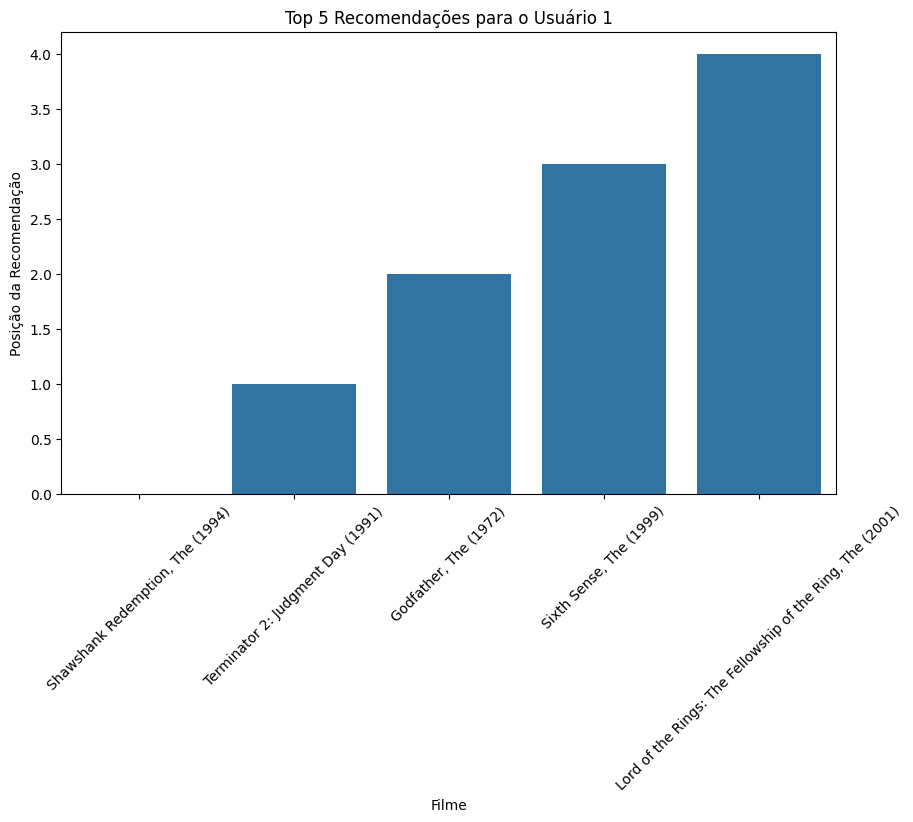

In [ ]:
# -------------------- Gerar e Visualizar Recomendações --------------------

# Defina o ID do usuário para o qual você quer gerar recomendações
user_id = 1 # Exemplo: gerar recomendações para o usuário com ID 1
top_n = 5    # Número de recomendações desejadas

# Geração de recomendações para o usuário especificado
try:
    recomendacoes = gerar_recomendacoes(user_id, user_movie_matrix, similaridade, top_n=top_n)
    print(f"\nRecomendações para o usuário {user_id}:", recomendacoes)
except ValueError as e:
    print(e)

# Preparando os dados para visualização
recomendados = pd.DataFrame({'movieId': recomendacoes})
recomendados = recomendados.merge(movies, on='movieId', how='left')

# Plotando as recomendações
plt.figure(figsize=(10, 6))
sns.barplot(x=recomendados['title'], y=recomendados.index)
plt.title(f"Top {top_n} Recomendações para o Usuário {user_id}")
plt.xlabel("Filme")
plt.ylabel("Posição da Recomendação")
plt.xticks(rotation=45)
plt.show()